## Introduction to bandit problems and algorithms

In [27]:
%matplotlib inline
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from math import *
from numpy import *
import numpy as np
from numpy.random import *
from scipy.misc import *
from scipy.stats import *

from typing import Optional

In the sequel we consider the stochastic bandit problem with only two actions $0$ and $1$. We assume that their rewards are Bernoulli random variables with parameters $\mu_0 = 0.6$ and $\mu_1 = 0.4$ (so that action $0$ is optimal, but we have to learn it from experience!).

### Simulation of Bernoulli random variables:

In [4]:
binomial(n=10, p=0.5, size=46)

array([5, 4, 5, 6, 3, 6, 5, 6, 3, 3, 7, 6, 3, 8, 4, 6, 3, 6, 8, 2, 7, 5,
       6, 5, 6, 4, 5, 4, 6, 9, 6, 5, 5, 3, 6, 5, 4, 2, 4, 6, 5, 9, 6, 5,
       1, 4])

In [6]:
binomial(n=1, p=0.5, size=5)

array([0, 0, 0, 1, 0])

### Notation:
- The arm played by the algorithm at time $t$ is denoted by $I_t$.
- The reward of arm $a$ at time $t$ is $g_t(a)$.
- We write $\hat{\mu}_t(a)$ for the average of the rewards obtained from arm $a \in \{0,1\}$ between iterations $1$ and $t$.
- We also write $T_a(t)$ for the number of times arm $a$ was played up to iteration $t$.
- In particular, we have
$$\hat{\mu}_t(a) = \frac{1}{T_a(t)} \sum_{k=1}^t g_k(a) \mathbb{1}_{I_k = a}$$

## Why stopping exploring is a bad idea if we do not know the time horizon.

The "Explore-Then-Commit" algorithm proceeds as follows:
- alternatively play actions $0$ and $1$ from iteration $t=1$ up to iteration $t=\tau$
- determine the empirically best arm
$$A \in \rm{argmax}_{a \in \{0,1\}} \hat{\mu}_{\tau}(a)$$
- play arm A forever.

Questions: Understand the code below and
1. Show that, if $\tau$ is fixed, then the (expected) regret after $T$ rounds grows linearly with $T$ when $T \to +\infty$ (which is very bad). Explain the title of this section.
2. Compare the above conclusion with the theoretical result stating that the regret is only logarithmic in $T$ provided $m$ is chosen roughly like $m \approx \log(T \Delta^2)/\Delta^2$, where $\Delta = |\mu_0 - \mu_1|$.
3. Try different values for the parameters $m$, $\mu_0$, and $\mu_1$. Interpret the results in terms of exploration/exploitation.

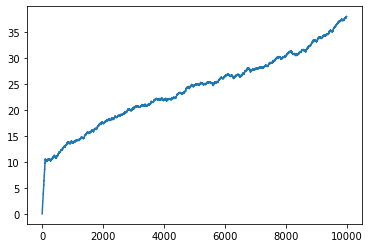

In [17]:
m = 50
tau = 2*m # size of exploration phase
T = 10**4  # total number of rounds
MC = 200    # number of Monte-Carlo experiments
mu = [0.6,0.4]
# Try also:
#mu = [0.8,0.2]
#mu = [0.51,0.49]
mustar = max(mu)
avregret = zeros(T)  # will contain an estimate of the (expected) regret R_t for all t<=T

for experiment in range(MC):
    regret = 0
    muhat = [0,0] # after exploration phase, will contain estimates of expected rewards of arms 0 and 1
    # exploration phase
    for t in range(tau):
        A = t % 2 # we choose 0 or 1 alternatively
        r = binomial(1, mu[A]) # observed reward
        muhat[A] += r/m
        regret += mustar - r
        avregret[t] += regret/MC # updates the estimate of the expected regret at time t
    # exploitation phase: play best arm forever
    A = argmax(muhat)
    for t in range(tau, T):
        r = binomial(1,mu[A]) # observed reward
        regret += mustar - r
        avregret[t] += regret/MC # update the estimate of the (expected) regret at time t
    
plt.plot(avregret)
# T_lin = np.linspace(0, T, num=50)
# Delta = np.max(mu) - np.min(mu)
# plt.plot(T_lin, np.log(T_lin*Delta**2)/(Delta))

In [37]:
def run_ECM(
        m: int = 50,
        mu: list[float] = [0.6, 0.4],
        T: int = 10**4,                 # total number of rounds
        MC: int = 200,                  # number of Monte-Carlo experiments
    ) -> np.ndarray :


    tau = 2*m # size of exploration phase

    mustar = np.max(mu)
    avregret = np.zeros(T)  # will contain an estimate of the (expected) regret R_t for all t<=T

    for experiment in range(MC):
        regret = 0
        muhat = [0,0] # after exploration phase, will contain estimates of expected rewards of arms 0 and 1
        # exploration phase
        for t in range(tau):
            A = t % 2 # we choose 0 or 1 alternatively
            r = binomial(1, mu[A]) # observed reward
            muhat[A] += r/m
            regret += mustar - r
            avregret[t] += regret/MC # updates the estimate of the expected regret at time t
        # exploitation phase: play best arm forever
        A = argmax(muhat)
        for t in range(tau, T):
            r = binomial(1,mu[A]) # observed reward
            regret += mustar - r
            avregret[t] += regret/MC # update the estimate of the (expected) regret at time t 

    return avregret


def ECM_plot(m: int = 50,
        mu: list[float] = [0.6, 0.4],
        T: int = 10**4,                 # total number of rounds
        MC: int = 200,                  # number of Monte-Carlo experiments
        ax: Optional[plt.Axes] = None
    ) -> list[plt.Line2D]:

    if ax is None:
        ax = plt.gca()

    avregret = run_ECM(m = 50, mu = [0.6, 0.4], T = 10**4, MC = 200)

    line = ax.plot(np.arange(avregret.size), avregret)
    return line

Pour $\mu = [0.6, 0.4]$, pour la première partie de la courbe on est en politique 50% sur chaque machine (mu), donc on moyenne on prend ...

array([1.0000e-02, 2.1500e-01, 2.0500e-01, ..., 3.2245e+01, 3.2210e+01,
       3.2290e+01])

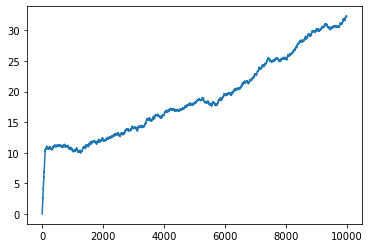

In [32]:
run_ECM(m=50, mu=[0.6, 0.4])

array([1.00000e-02, 2.65000e-01, 2.15000e-01, ..., 4.03030e+02,
       4.03060e+02, 4.03055e+02])

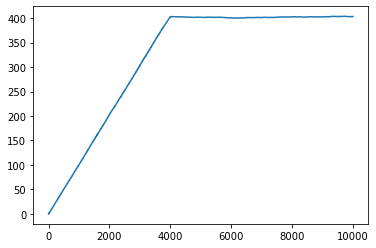

In [31]:
run_ECM(m=2_000, mu=[0.6, 0.4])

ValueError: cannot find widget or abbreviation for argument: 'val'

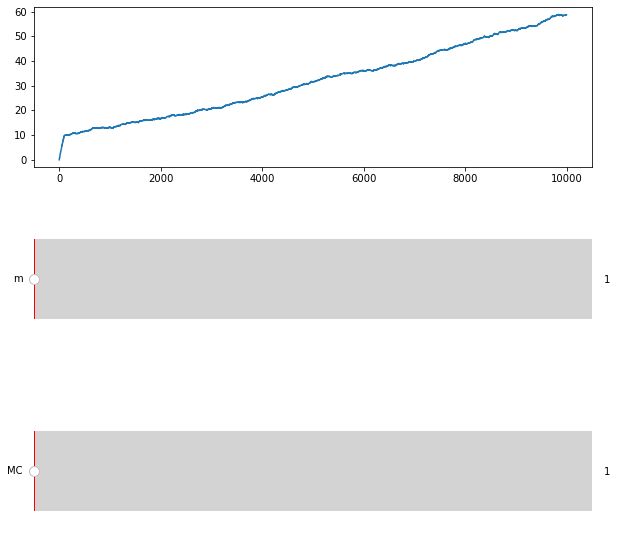

In [40]:
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import *

fig, (ax_plot, ax_s1, ax_s2) = plt.subplots(3, 1, figsize=(10,10))

ax_s1.spines['top'].set_visible(True)
ax_s1.spines['right'].set_visible(True)
ax_s2.spines['top'].set_visible(True)
ax_s2.spines['right'].set_visible(True)

line, *_ = ECM_plot(m=2_000, mu=[0.6, 0.4], ax=ax_plot)

m_slide = Slider(ax_s1, 'm', 1, 10)
MC_slide = Slider(ax_s2, 'MC', 1, 10)


def update(val):
    m = m_slide.val
    MC = MC_slide.val
    
    avregret = run_ECM(m = m, mu = [0.6, 0.4], T = 10**4, MC = MC)

    line.set_data(np.arange(avregret.size), avregret)
    fig.canvas.draw_idle()
    
m_slide.on_changed(update)
MC_slide.on_changed(update)

interact(update)

In [35]:
line

## The $\epsilon$-greedy algorithm.

The "$\epsilon$-greedy algorithm" proceeds as follows:
- For the first two iterations: play actions $0$ and $1$ once
- At each iteration $t=3,4,5,\ldots$,
    - with probability $1-\epsilon_t$, play the empirically best arm
    - with probability $\epsilon_t$, play action $0$ or $1$ uniformly at random

Questions: Implement the algorithm and
1. Show that, if $\epsilon_t = \min \left\{\frac{c}{t},1\right\}$ with a large enough constant $c>0$, then the (expected) regret after $T$ rounds only grows logarithmically when $T \to +\infty$.
2. What happens if we choose $\epsilon_t=\epsilon$ constant over time? or too small a value for $c$? (interpret the results in terms of exploration/exploitation)
3. What is the main advantage of $\epsilon$-greedy compared to Explore-Then-Commit? Which drawback remains?

In [42]:
T = 5*10**3  # total number of rounds
MC = 500    # number of Monte-Carlo experiments
mu = [0.6, 0.4]
# Try also:
#mu = [0.8,0.2]
#mu = [0.51,0.49]
mustar = max(mu)

# exploration parameter of the algorithm: epsilon_t = min(c/t,1) where
c = 6*2/abs(mu[0]-mu[1])**2
# (the choice of any c > 5*K/\Delta^2 is guaranteed by the theory to yield logarithmic regret)

avregret = zeros(T)  # will contain an estimate of the (expected) regret R_t for all t<=T

for experiment in range(MC):
    regret = 0
    cumulRew = np.array([0, 0])
    muhat = np.array([0, 0]) # estimates of expected rewards for arms 0 and 1
    armcounts = np.array([0, 0]) # number of draws for arms 0 and 1
    # initialization (dates 0 et 1)
    for t in range(2):
        if t==0:
            armcounts[0] += 1
            r = binomial(1, mu[0]) # observed reward
            # muhat[0] += r/m
            cumulRew[0] += r
            regret += mustar - r
            avregret[0] += regret # updates the estimate of the expected regret at time t
        elif t==1:
            armcounts[1] += 1
            r = binomial(1, mu[1]) # observed reward
            # muhat[1] += r/m
            cumulRew[1] += r
            regret += mustar - r
            avregret[1] += regret # updates the estimate of the expected regret at time t
    # exploration-exploitation phase: play epsilon-greedy
    for t in range(2,T):
        
        Jt = argmax(muhat)
        epsilon_t = np.min(c/t, 1)
        if binomial(1, epsilon_t): #We explore
            A = binomial(1, 0.5)
        else: #We exploit
            A = np.argmax(cumulRew/armcounts)
        r = binomial(1, mu[A])
        cumulRew[A] += 1
        armcounts[A] += 1
        regret += mustar - r
        avregret[t] += regret/MC

AxisError: axis 1 is out of bounds for array of dimension 0

## The UCB algorithm.

The UCB-algorithm proceeds as follows:
- For the first two iterations: play actions $0$ and $1$ once.
- At each iteration $t=3,4,5,\ldots$, play the arm that maximizes the Upper Confidence Bound:
$$I_t \in \rm{argmax}_{a \in \{0,1\}} \left\{\hat{\mu}_{t-1}(a) + \sqrt{\frac{2 \log(t)}{T_a(t-1)}} \;\right\}$$
   
Questions: Implement the algorithm and
1. Show that the (expected) regret after $T$ rounds also grows logarithmically when $T \to +\infty$.
2. Compare UCB with the first two algorithms in terms of performances and of required prior knowledge.

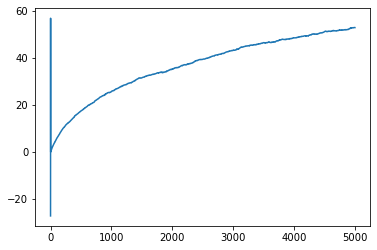

In [43]:
T = 5*10**3  # total number of rounds
MC = 500    # number of Monte-Carlo experiments
mu = [0.6,0.4]
# Try also:
#mu = [0.8,0.2]
#mu = [0.51,0.49]
mustar = max(mu)

avregret = zeros(T)  # will contain an estimate of the (expected) regret R_t for all t<=T

for experiment in range(MC):
    regret = 0
    cumulRew = np.array([0, 0])
    muhat = np.array([0, 0]) # estimates of expected rewards for arms 0 and 1
    armcounts = np.array([0, 0]) # number of draws for arms 0 and 1
    # initialization (dates 0 et 1)
    for t in range(2):
        if t==0:
            armcounts[0] += 1
            r = binomial(1, mu[0]) # observed reward
            # muhat[0] += r/m
            cumulRew[0] += r
            regret += mustar - r
            avregret[0] += regret # updates the estimate of the expected regret at time t
        elif t==1:
            armcounts[1] += 1
            r = binomial(1, mu[1]) # observed reward
            # muhat[1] += r/m
            cumulRew[1] += r
            regret += mustar - r
            avregret[1] += regret # updates the estimate of the expected regret at time t
    # exploration-exploitation phase: play epsilon-greedy
    for t in range(2,T):
        A = np.argmax(cumulRew/armcounts + np.sqrt(2*log(t+1)/armcounts))

        r = binomial(1, mu[A])
        cumulRew[A] += r
        armcounts[A] += 1
        regret += mustar - r
        avregret[t] += regret/MC

plot(avregret)
